# weekly report generator
## WARNING: out of date with .py version
Creates a folder and populates it with statistical plots based on jobs that started (and have now finished) for the week ending in today's date. Designed to be run by anyone, but may need to change some python libraries.

Can be changed to specify a specific date.

Plots made: master histogram, largest users, weekly node data flow rate, table of totals

In [1]:

# import  epmt query 
print('importing epmt_query')
import epmt_query as eq
# import matplot for better plotting functions
import sys
sys.path.insert(0,'/home/Avery.Kiihne/pip_experiment')   #required for matplotlib in my workstation env
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages     #allows for creation of multipage pdf
import numpy as np
# import pandas. optional but helpful 'display.max_columns' arg shows all DataFrame columns when printing
print('importing pandas')
import os
import pandas
import datetime
from datetime import timedelta, date
#for percentile intepolation
import scipy.stats as stats

import time
import pickle   #to load in metrics history
pandas.set_option('display.max_columns', None)
off_set_days = 4    #number of days delayed the query is. This allows for job completion and an easier query

importing epmt_query
importing pandas


In [2]:
#check to see if day is already recorded. if it is, exit code
#this allows code to be run much more frequentky, without redoing days, which helps whith timing out issues
recent_job = eq.get_jobs(limit = 1, after = -1*off_set_days, fmt = 'orm')[0]

recent_job_date = recent_job.created_at
current_date = str(recent_job_date.strftime("%m")+'-'+recent_job_date.strftime("%d")+'-'+recent_job_date.strftime("%y"))
filename = 'weekly_metric_history_DO_NOT_DELETE.pkl'
# Read dictionary pkl file
with open(filename, 'rb') as fp:
    metrics_history = pickle.load(fp)
if current_date in metrics_history['date']:
    sys.exit(['date already recorded'])
    

In [3]:

#query for data of the last week from exactly this moment
start = time.time()
x = datetime.datetime.now() - timedelta(off_set_days)
limiter = eq.get_jobs(after=-9, before =-1*off_set_days, fmt = 'orm')  #to speed up query, we use orm to count number of jobs in the week and use this as our limit
job_num = limiter.count()
all_jobs = []
loop_number = 100#How many parts the query is broken into. Small queries run faster.
for aa in range(loop_number):
    temp_jobs = eq.get_jobs(limit =int(job_num/loop_number), after = (-7-off_set_days), before = -1*off_set_days, offset = int(job_num*aa/loop_number), fmt = 'dict' , trigger_post_process = False)
    all_jobs.extend(temp_jobs)
    print('at ',(aa+1)*100/loop_number,'% completion. time elapsed:',(time.time()-start)/60)
print('jobs in this time period: ', len(all_jobs))

at  1.0 % completion. time elapsed: 0.005415674050649007
at  2.0 % completion. time elapsed: 0.008915627002716064
at  3.0 % completion. time elapsed: 0.01220248540242513
at  4.0 % completion. time elapsed: 0.015528567632039388
at  5.0 % completion. time elapsed: 0.018814671039581298
at  6.0 % completion. time elapsed: 0.023363637924194335
at  7.0 % completion. time elapsed: 0.026641778151194253
at  8.0 % completion. time elapsed: 0.030087677637736003
at  9.0 % completion. time elapsed: 0.03333217700322469
at  10.0 % completion. time elapsed: 0.03679990371068319
at  11.0 % completion. time elapsed: 0.04022104740142822
at  12.0 % completion. time elapsed: 0.0439146876335144
at  13.0 % completion. time elapsed: 0.04750758012135824
at  14.0 % completion. time elapsed: 0.05074252287546794
at  15.0 % completion. time elapsed: 0.05398420890172322
at  16.0 % completion. time elapsed: 0.05716263850529989
at  17.0 % completion. time elapsed: 0.06042511463165283
at  18.0 % completion. time elapse

In [4]:
'''#backup option for job query. do query for a specific week
start_date = datetime.datetime(2024, 4, 17, 23, 00)    #day that ends the week
older_date = start_date + datetime.timedelta(days =-7) 
x = start_date

start = time.time()
older_orm = eq.get_jobs(after=older_date, fmt = 'orm')
start_orm = eq.get_jobs(after=start_date, fmt = 'orm')
job_num = older_orm.count() - start_orm.count()    #clip off the jobs that happened between current time and the end of the week being reported on
all_jobs = []
loop_number = 100   #How many parts the query is broken into. Small queries run faster.
for aa in range(loop_number):
    temp_jobs = eq.get_jobs(limit =int(job_num/loop_number), offset = int(job_num*aa/loop_number) + start_orm.count(), fmt = 'dict', trigger_post_process = False)
    all_jobs.extend(temp_jobs)
    print('at ',(aa+1)*100/loop_number,'% completion. time elapsed:',(time.time()-start)/60)
print('jobs in this time period: ', len(all_jobs))'''

"#backup option for job query. do query for a specific week\nstart_date = datetime.datetime(2024, 4, 17, 23, 00)    #day that ends the week\nolder_date = start_date + datetime.timedelta(days =-7) \nx = start_date\n\nstart = time.time()\nolder_orm = eq.get_jobs(after=older_date, fmt = 'orm')\nstart_orm = eq.get_jobs(after=start_date, fmt = 'orm')\njob_num = older_orm.count() - start_orm.count()    #clip off the jobs that happened between current time and the end of the week being reported on\nall_jobs = []\nloop_number = 100   #How many parts the query is broken into. Small queries run faster.\nfor aa in range(loop_number):\n    temp_jobs = eq.get_jobs(limit =int(job_num/loop_number), offset = int(job_num*aa/loop_number) + start_orm.count(), fmt = 'dict', trigger_post_process = False)\n    all_jobs.extend(temp_jobs)\n    print('at ',(aa+1)*100/loop_number,'% completion. time elapsed:',(time.time()-start)/60)\nprint('jobs in this time period: ', len(all_jobs))"

In [5]:
#find today's date and create folder with that date in a fashion usable by folders
chosen_date = str(x.strftime("%m")+'-'+x.strftime("%d")+'-'+x.strftime("%y"))
if not os.path.isdir('report_directory/weekly_report_'+chosen_date):
    os.makedirs('report_directory/weekly_report_'+chosen_date+'/')

# Make plots
with setup done, we will now produce a series of plots and data to save out to the report

2.964391691394659 % at  0.012884445985158284 minutes
5.931750741839763 % at  0.012908375263214112 minutes
8.899109792284866 % at  0.01293115218480428 minutes
11.86646884272997 % at  0.012959913412729899 minutes
14.833827893175075 % at  0.012993959585825603 minutes
17.801186943620177 % at  0.01301652193069458 minutes
20.76854599406528 % at  0.013039302825927735 minutes
23.735905044510385 % at  0.013071175416310627 minutes
26.703264094955493 % at  0.01309719483057658 minutes
29.670623145400594 % at  0.013119757175445557 minutes
32.6379821958457 % at  0.013141882419586182 minutes
35.6053412462908 % at  0.013162672519683838 minutes
38.57270029673591 % at  0.013183550039927164 minutes
41.54005934718101 % at  0.013204507033030192 minutes
44.50741839762611 % at  0.013225368658701579 minutes
47.474777448071215 % at  0.013245880603790283 minutes
50.44213649851632 % at  0.013458569844563803 minutes
53.40949554896143 % at  0.013480718930562336 minutes
56.37685459940652 % at  0.013509921232859294 

<Figure size 432x288 with 0 Axes>

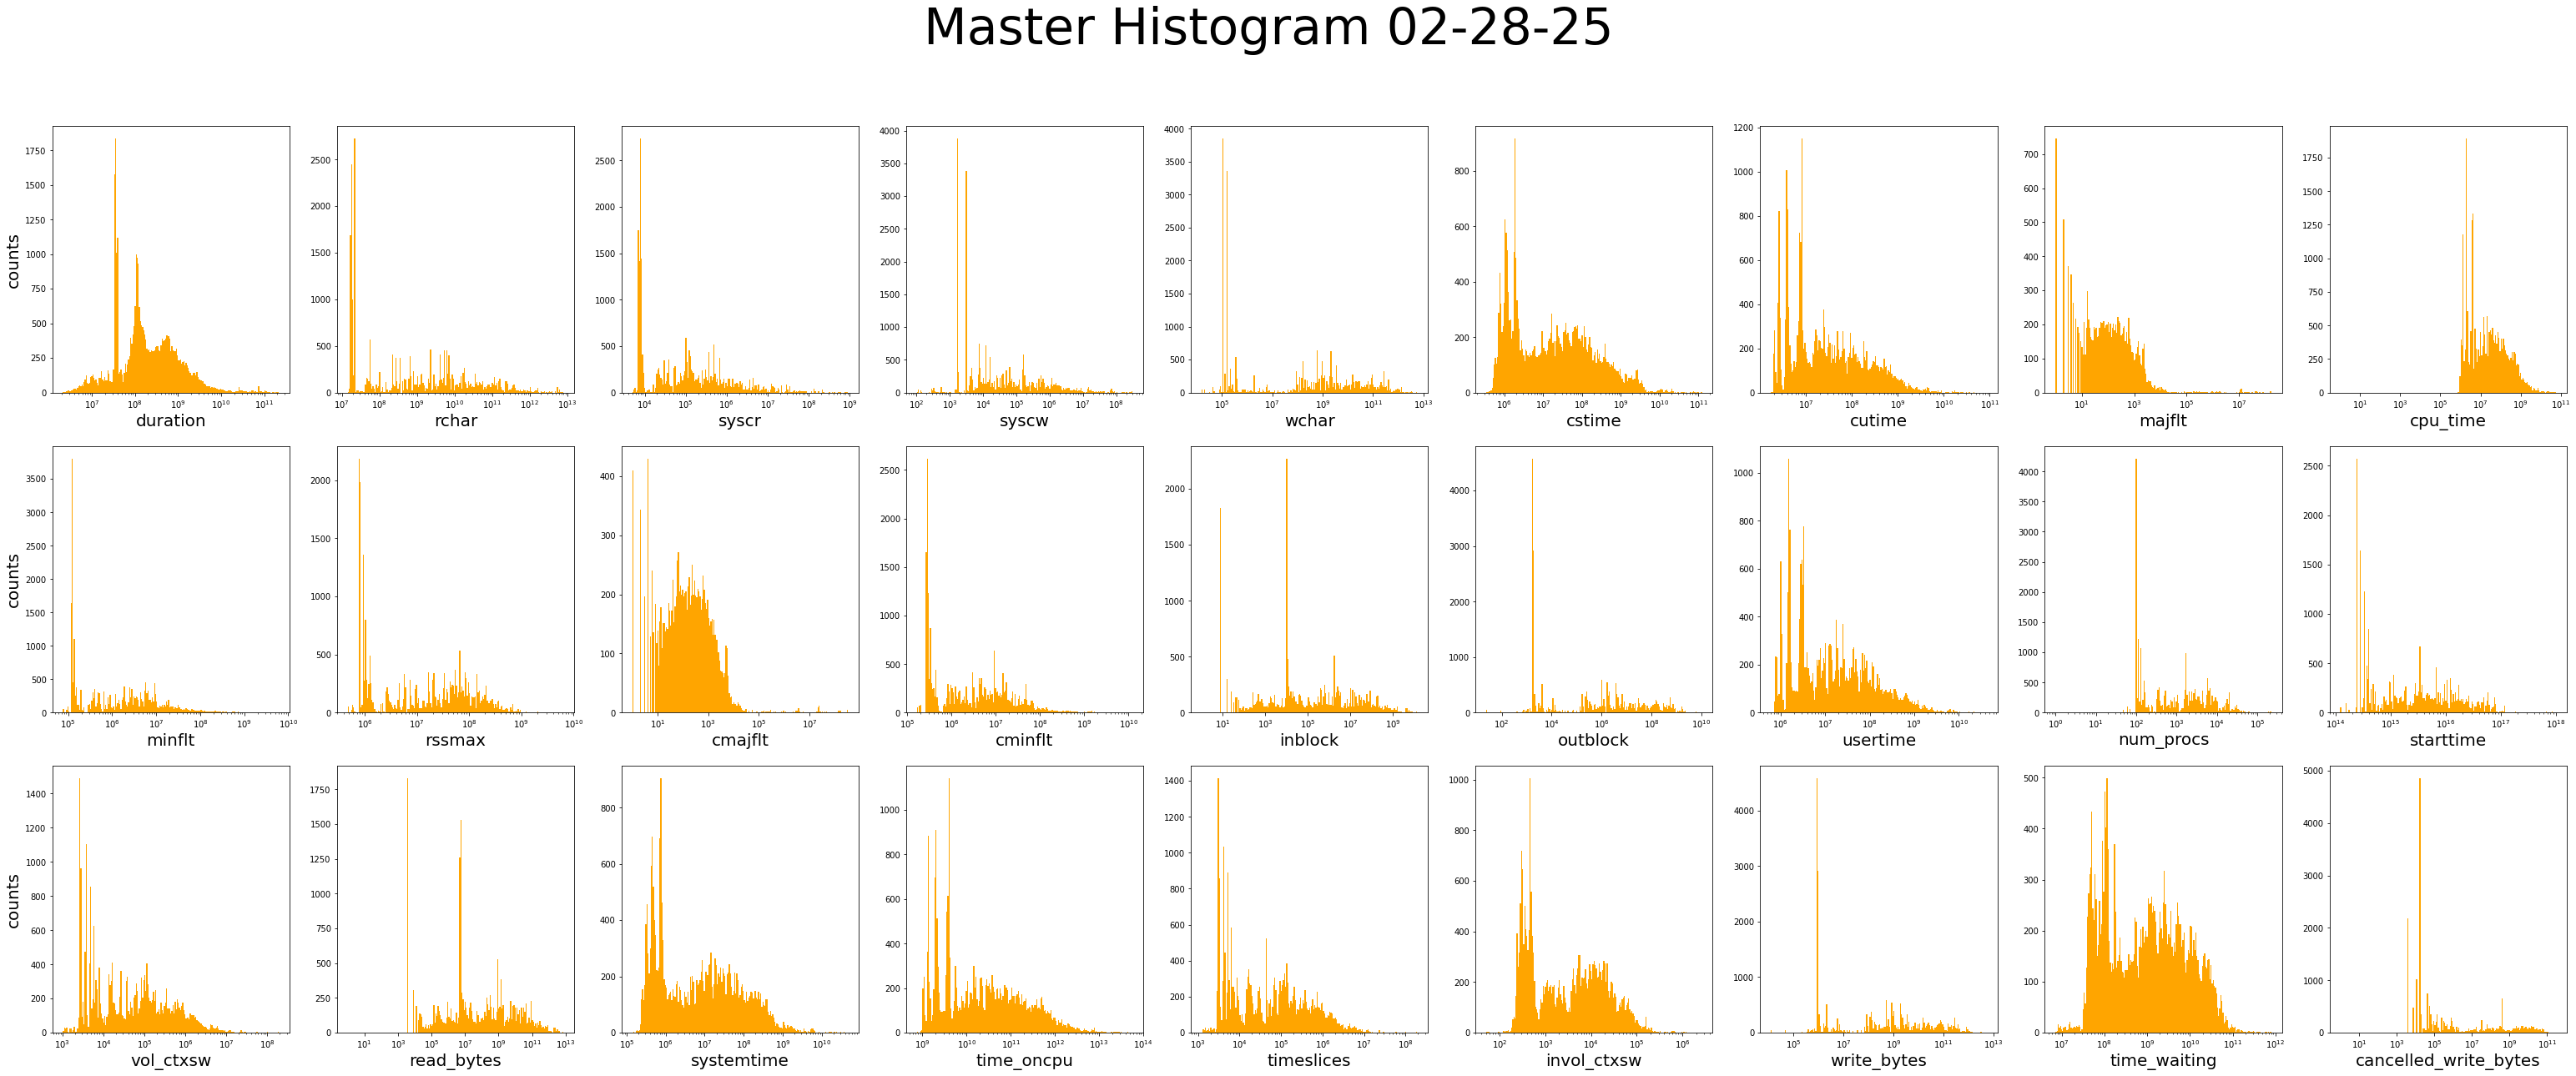

In [6]:
###Master histogram is a 3x9 plot of subplots, with each plot being a histogram of a specific epmt metric, plotted with 200 bins, and on a log scale
#Generates lists for all variables that can be used to make master histogram and totals table
#Construct dictionaries
fig1 = plt.figure() 

start = time.time()
metric_list = [ 'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt','cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'starttime', 'vol_ctxsw', 'read_bytes', 'systemtime', 'time_oncpu', 'timeslices', 'invol_ctxsw', 'write_bytes', 'time_waiting', 'cancelled_write_bytes']
metric_dict = {}
for i in metric_list:
    metric_dict[i] = []   #Use metric names as keys for new dictionary for searching epmt dictionary
#Sort into usbale variables in one for loop
fig_master, ax = plt.subplots(nrows=3,ncols=9,figsize=(54,20))
ax =ax.ravel()    #Matplotlib command that is mandatory and mysterious
for ff in range(len(metric_list)):
    metric = metric_list[ff]
    for job_instance in range(len(all_jobs)):
        #to track progress of secondary post processing for neccesary jobs
        if (job_instance+1) % 1000 == 0 and metric == 'rchar':
            print((job_instance/len(all_jobs)*100), '% at ', (time.time()-start)/60, 'minutes')
        if all_jobs[job_instance].get(metric) == None:    #If job does not have all data, it finds that job and processes it through a new query
            all_jobs[job_instance] = eq.get_jobs(jobs = all_jobs[job_instance]['jobid'], fmt = 'dict',  trigger_post_process = True)[0]  
        #double check secondary query was succesful
        if all_jobs[job_instance].get(metric) == None:
            continue
        if all_jobs[job_instance].get(metric) != None:   #Prevents breakage if set is empty or doesn't exist
            metric_dict[metric].append(all_jobs[job_instance][metric])
    #Make plot
    plt.style.use('default')   #Resets plot style to normal, avoiding any local environment settings that may mess with plot

    bins = 200
    #Bin check for zero, as it messes up np.log10()
    if min(metric_dict[metric]) == 0:
        bottom_bin = 0
    else:
        bottom_bin = np.log10(min(metric_dict[metric]))
    #Set scaling metric
    #Makes master histogram
    ax[ff].hist(metric_dict[metric], bins = np.logspace(bottom_bin,np.log10(max(metric_dict[metric])),bins), color = 'orange')
    ax[ff].set_xlabel(metric, fontsize = 20)
    ax[ff].set_xscale('log')
ax[0].set_ylabel('counts', fontsize = 20)
ax[9].set_ylabel('counts', fontsize = 20)
ax[18].set_ylabel('counts', fontsize = 20)
plt.suptitle('Master Histogram '+chosen_date, fontsize = 60)
plt.savefig('report_directory/weekly_report_'+chosen_date+'/master_hist_'+chosen_date+'.pdf', bbox_inches='tight', format = 'pdf')

<Figure size 640x480 with 0 Axes>

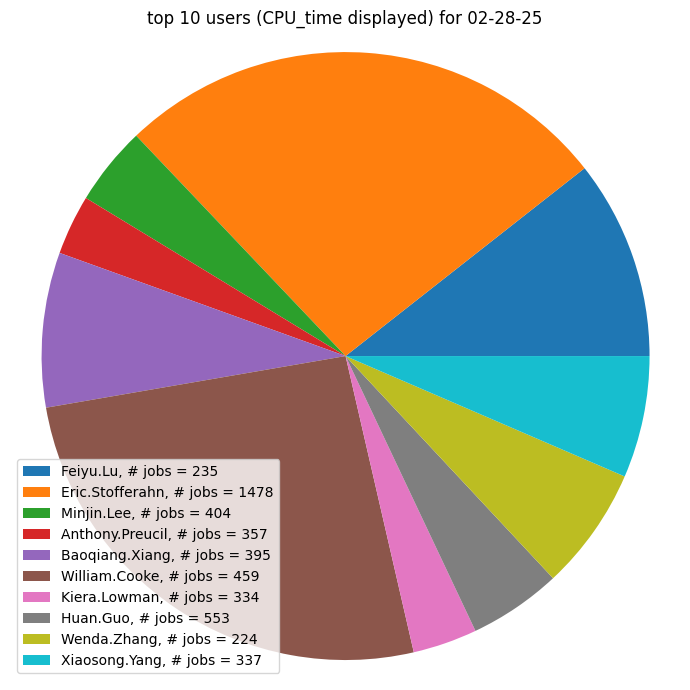

In [15]:
#Generate weekly user ranking. Ranking based on rssmax and CPU time. Piechart by CPU time 
fig2 = plt.figure() 
users = []
for job in all_jobs:
    users.append(job['user'])
users = set(users)   #creates a list of every unique user name
totals = {}
scores = []
final_score = {}
for person in users:
    totals[person] = [0,0,0]   #rssmax, cpu_time, number of jobs
    final_score[person] = 0
#sort data into each person. we care about rssmax, cpu_time, and total number of jobs
for job in all_jobs:
    if job.get('rssmax'):
        totals[job['user']][0] += job['rssmax']
        totals[job['user']][1] += job['cpu_time']
        totals[job['user']][2] += 1
for person in users:
    if totals[person][2] == 0:    #edge case in which user has corrupted jobs
        continue
    
    else:
        totals[person][0] = totals[person][0]/totals[person][2]   #average rssmax
        totals[person][1] = totals[person][1]                     #cpu_time
        scores.append([person,totals[person][0],totals[person][1], totals[person][2]])
#sort rankings
num_jobs_ranking = sorted(scores, key=lambda score: score[3], reverse=True)
num_jobs_ranking = num_jobs_ranking[0:int(.7*len(num_jobs_ranking))]   #elimate the bottom 70% based on jobs run
rssmax_ranking = sorted(num_jobs_ranking, key=lambda score: score[1], reverse=True)
cpu_time_ranking = sorted(num_jobs_ranking, key=lambda score: score[2], reverse=True)
#tally final score based on ranking of average rssmax and cpu_time  totalled
final_score = {}
for aa in range(len(num_jobs_ranking)):   #make keys fro score dictionary
    final_score[num_jobs_ranking[aa][0]] = 0
for count in range(len(num_jobs_ranking)):   #combine score
    final_score[rssmax_ranking[count][0]] += count
    final_score[cpu_time_ranking[count][0]] += count
#wrap into list because dictionaries do not sort easily
final_rank = []
for bb in range(len(num_jobs_ranking)):   #make keys fro score dictionary
    final_rank.append([final_score[num_jobs_ranking[bb][0]], num_jobs_ranking[bb][0]])
final_rank = sorted(final_rank) #top users at beginning of list 

# Data to plot
num_users = 10   #number of users that appears in chart
labels = []
sizes = []
#creat lists with order based on final score
for aa in range(num_users):
    name = final_rank[aa][1]
    labels.append(str(name+', # jobs = '+str(totals[name][2])))
    sizes.append(totals[name][1])

# Plot
fig_users = plt.figure(figsize=(7,7))
plt.style.use('default')
plt.pie(sizes)
plt.axis('equal')
plt.title('top ' +str(num_users)+' users (CPU_time displayed) for ' + chosen_date)
plt.legend(labels=labels, loc = 'lower left')
plt.tight_layout()
plt.savefig('report_directory/weekly_report_'+chosen_date+'/user_ranking_'+chosen_date+'.pdf', bbox_inches='tight', format = 'pdf')

In [14]:

totals[person]

[0, 0, 0]

/home/fms/local/epmt/4.9.2-centos-7/epmt-install/epmt/epmt:81: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/fms/local/epmt/4.9.2-centos-7/epmt-install/epmt/epmt:81: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/fms/local/epmt/4.9.2-centos-7/epmt-install/epmt/epmt:81: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 640x480 with 0 Axes>

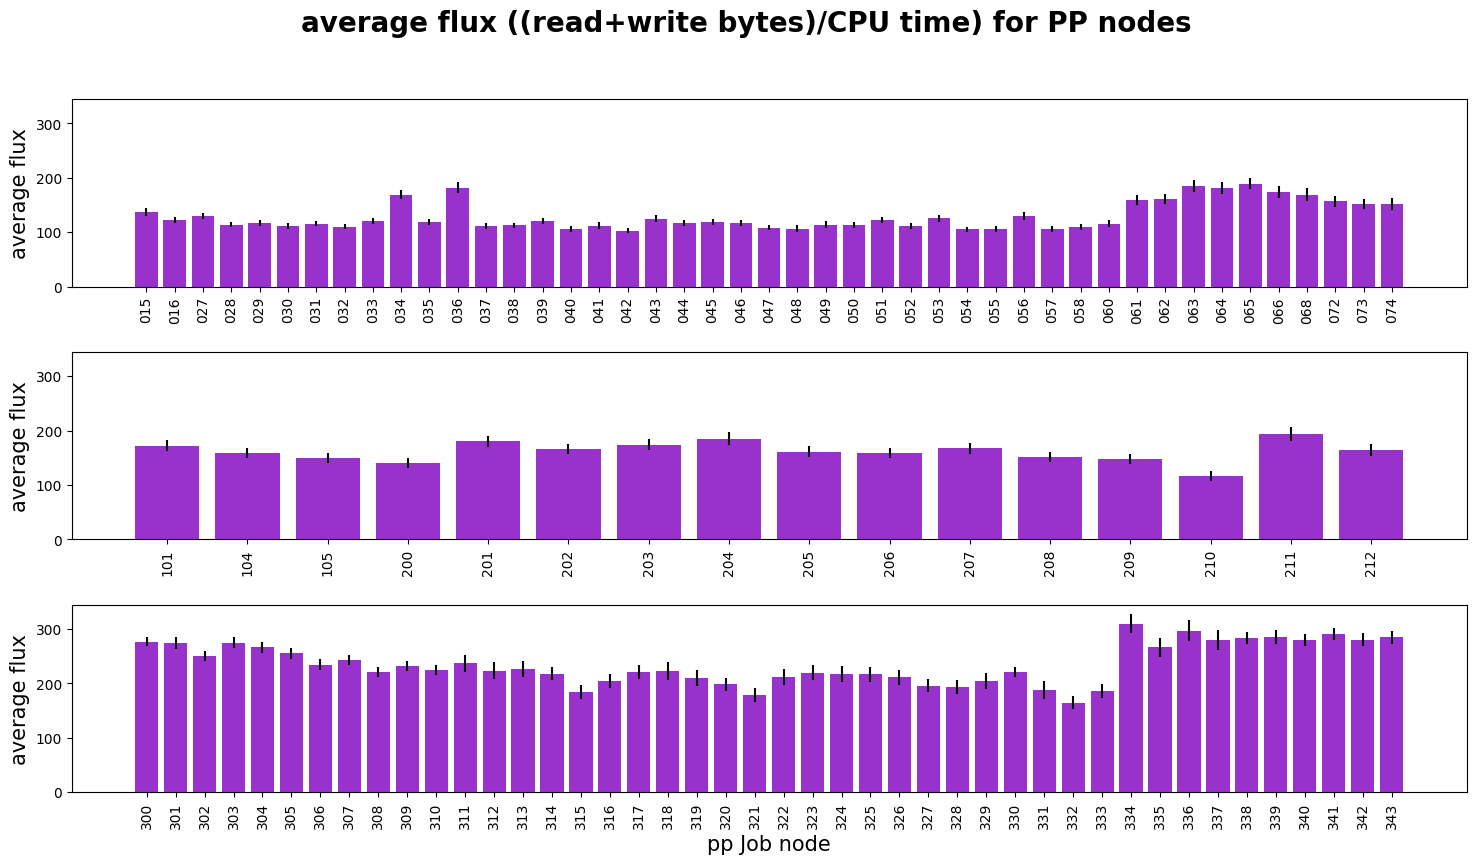

nodes dictionary saved successfully to file


<Figure size 640x480 with 0 Axes>

In [9]:
###plot of data flow rate for each node. data flow rate = write&read bytes/cpu_time. It is an aproximate of node health, as it represents the rate of data the node is going through.
#Pull data from jobs and store in dictionaries
#Make list of unique nodes
fig3 = plt.figure() 

node_list = [] 
for jobs_instance in range(len(all_jobs)):
    node_list.append(all_jobs[jobs_instance]['env_dict']['SLURM_NODELIST'])
node_list = sorted(set(node_list))
#Make dictionary with each unique name as a key
CPU_runtime_dict = {}
wr_bytes_dict = {}
rd_bytes_dict = {}
flow_avg_dict = {}
#Each tag group has its own key in variable dictonary
for dict_key in node_list:   
    CPU_runtime_dict[dict_key] = []
    wr_bytes_dict[dict_key] = []
    rd_bytes_dict[dict_key] = []
    flow_avg_dict[dict_key] = []
#Now we can run through evry job and grab its specific stats to attach to its node
for jobs_instance in range(len(all_jobs)):   
    dict_key_instance = all_jobs[jobs_instance]['env_dict']['SLURM_NODELIST']
    if all_jobs[jobs_instance].get('read_bytes') is not None:
        if all_jobs[jobs_instance]['read_bytes'] + all_jobs[jobs_instance]['write_bytes'] > 0:   #if statements to adress problem cases
            CPU_runtime_dict[dict_key_instance].append(all_jobs[jobs_instance]['cpu_time'])
            wr_bytes_dict[dict_key_instance].append(all_jobs[jobs_instance]['write_bytes'])
            rd_bytes_dict[dict_key_instance].append(all_jobs[jobs_instance]['read_bytes'])
            flow_avg_dict[dict_key_instance].append((all_jobs[jobs_instance]['write_bytes']+all_jobs[jobs_instance]['read_bytes'])/all_jobs[jobs_instance]['cpu_time'])

#Calculations Section
#We separate nodes by type, as an nodes do different things than pp nodes
flow_avg = []
flow_avg_pp = []
flow_err_pp = []
flow_error = []
pp_nodes = []
for node in node_list:
    if node.find('an') == -1:
        pp_nodes.append(node)
#Average and error calculations for each node
for node_name in node_list:
    if node_name in pp_nodes:
        flow_avg_pp.append(sum(flow_avg_dict[node_name])/len(flow_avg_dict[node_name]))
        flow_err_pp.append(np.std(flow_avg_dict[node_name])/(len(flow_avg_dict[node_name]))**.5)
#Plot creation for rssmax of nodes
pp_nodes_short = []   #Shorten node name by removing letters. this makes plot slighly cleaer
for aa in range(len(pp_nodes)):
    pp_nodes_short.append(pp_nodes[aa][2:5])
#setup dictionaries
separated_node_data = {}
separated_node_data['zero'] = [],[],[]   #[node name], [value], [error]
separated_node_data['one_two'] = [],[],[]
separated_node_data['three'] = [],[],[]
node_categories = ['zero','one_two','three']
#separate nodes by first number, as that correlates to hardware
for ii in range(len(pp_nodes_short)):
    node = pp_nodes_short[ii]
    if node[0] == '0':
        separated_node_data['zero'][0].append(pp_nodes_short[ii])
        separated_node_data['zero'][1].append(flow_avg_pp[ii])
        separated_node_data['zero'][2].append(flow_err_pp[ii])
    if node[0] == '1' or node[0] == '2':
        separated_node_data['one_two'][0].append(pp_nodes_short[ii])
        separated_node_data['one_two'][1].append(flow_avg_pp[ii])
        separated_node_data['one_two'][2].append(flow_err_pp[ii])
    if node[0] == '3':
        separated_node_data['three'][0].append(pp_nodes_short[ii])
        separated_node_data['three'][1].append(flow_avg_pp[ii])
        separated_node_data['three'][2].append(flow_err_pp[ii])

#make subplots breaking up long plot
plt.style.use('default')
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,9), sharex = 'none', sharey = 'all', gridspec_kw={'hspace': .35,'wspace':.05})
ax =ax.ravel()
plt.suptitle('average flux ((read+write bytes)/CPU time) for PP nodes', fontweight ='bold', fontsize = 20)

for aa in range(3):
    node_key = node_categories[aa]
    ax[aa].bar(separated_node_data[node_key][0],separated_node_data[node_key][1], yerr = separated_node_data[node_key][2], label = 'flow', color = 'darkorchid')
    ax[aa].set_xticklabels(separated_node_data[node_key][0], rotation=90)
    ax[aa].set_ylabel('average flux', fontsize = 15)
#bells n whistles
plt.xlabel('pp Job node', fontsize = 15)

plt.tight_layout
plt.show()
plt.savefig('report_directory/weekly_report_'+chosen_date+'/node_flow_'+chosen_date+'.pdf', bbox_inches='tight', format = 'pdf')

#lastly save data to a pkl file
z = 0
nodes_dictionary = {}
for node in pp_nodes_short:
    nodes_dictionary[node] = [flow_avg_pp[z]]
    z +=1


#eventually will use data to predict relative health of varous nodes. But first We need to build up those records
filename = 'weekly_node_flow_history_DO_NOT_DELETE.pkl'
# Read dictionary pkl file
with open(filename, 'rb') as fp:
    nodes_history = pickle.load(fp)
    
#due to nodes being added in the future this code block exists as an edge case. when a node is added 
for node in pp_nodes_short:
    if node in nodes_history.keys():
        continue
    else:
        nodes_history[node] = len(nodes_history['016'])*[None]   #if node does not exist in list, then give it all zeros with an established

#record new dates
if chosen_date not in nodes_history['date']:
    for node in pp_nodes_short:
       nodes_history[node].append(nodes_dictionary[node][0])
    nodes_history['date'].append(chosen_date)
# save dictionary to weekly_metric_storage_DO_NOT_DELETE.pkl file
with open(filename, 'wb') as fp:
    pickle.dump(nodes_history, fp)
    print('nodes dictionary saved successfully to file')


/home/fms/local/epmt/4.9.2-centos-7/epmt-install/epmt/epmt:99: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
/home/fms/local/epmt/4.9.2-centos-7/epmt-install/epmt/epmt:102: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Text(0.5, 0.98, 'Totals for metrics 01-28-25')

<Figure size 640x480 with 0 Axes>

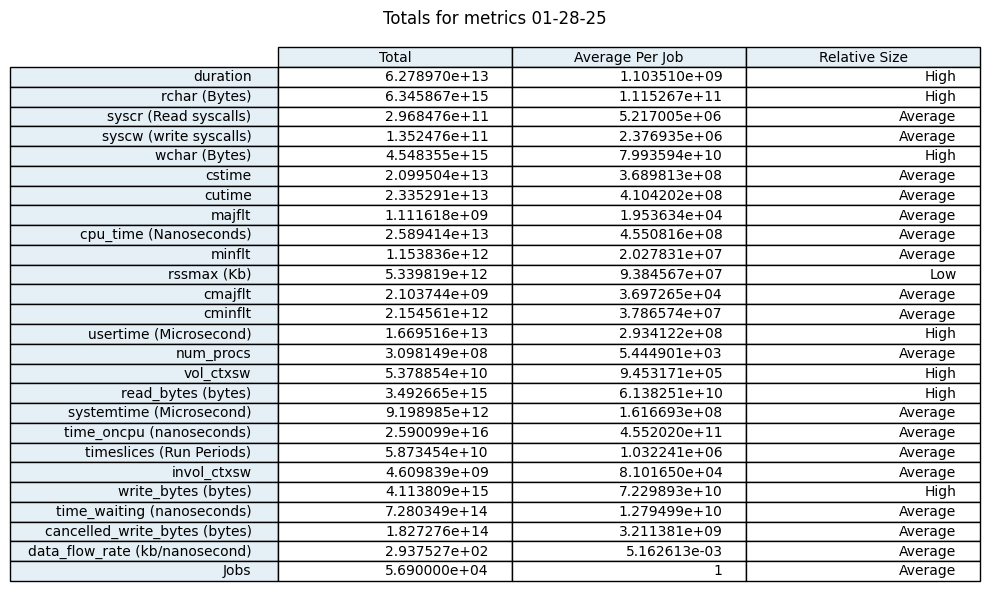

In [10]:
#This code is dark magic. Touch at your own risk.
#Create table of values
fig4 = plt.figure() 

summed_metric_list = [ 'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt','cminflt', 'usertime', 'num_procs', 'vol_ctxsw', 'read_bytes', 'systemtime', 'time_oncpu', 'timeslices', 'invol_ctxsw', 'write_bytes', 'time_waiting', 'cancelled_write_bytes']
summed_metric_dict = {}
for i in summed_metric_list:
    summed_metric_dict[i] = ["{:e}".format(sum(metric_dict[i])),"{:e}".format(sum(metric_dict[i])/len(all_jobs)), 'TBD']   #change formating to scientific notation
    
#Add in missing metrics by hand
flow = (sum(metric_dict['read_bytes'])+sum(metric_dict['write_bytes']))/sum(metric_dict['cpu_time'])
summed_metric_dict['data_flow_rate'] = ["{:e}".format(flow),"{:e}".format(flow/len(all_jobs)),'TBD']
summed_metric_dict['jobs'] = ["{:e}".format(len(all_jobs)),1,'TBD']
summed_metric_list.append('data_flow_rate')
summed_metric_list.append('jobs')

#add in percentiles row. need to call history and find percentile of weeks metric
filename = 'weekly_metric_history_DO_NOT_DELETE.pkl'
# Read dictionary pkl file
with open(filename, 'rb') as fp:
    metrics_history = pickle.load(fp)
specific_metric_history = metrics_history

for i in summed_metric_list:
    current_week_metric_percentile = stats.percentileofscore(np.array(metrics_history[i],dtype = float),float(summed_metric_dict[i][0]))
    if current_week_metric_percentile <= 5:
        summed_metric_dict[i][2] = 'VERY LOW'
    if 5 < current_week_metric_percentile <= 25:
        summed_metric_dict[i][2] = 'Low'    
    if 25 < current_week_metric_percentile <= 75:
        summed_metric_dict[i][2] = 'Average'
    if 75 < current_week_metric_percentile <= 95:
        summed_metric_dict[i][2] = 'High'
    if 95 < current_week_metric_percentile:
        summed_metric_dict[i][2] = 'VERY HIGH'
    
#some metrics need to have relative column based on averages instead total. we replace those values here
average_metric_list = ['rssmax', 'data_flow_rate']
for i in average_metric_list:
    current_week_metric_percentile = stats.percentileofscore(np.array(metrics_history[i],dtype = float)/np.array(metrics_history['jobs'],dtype = float),float(summed_metric_dict[i][1]))
    if current_week_metric_percentile <= 5:
        summed_metric_dict[i][2] = 'VERY LOW'
    if 5 < current_week_metric_percentile <= 25:
        summed_metric_dict[i][2] = 'Low'    
    if 25 < current_week_metric_percentile <= 75:
        summed_metric_dict[i][2] = 'Average'
    if 75 < current_week_metric_percentile <= 95:
        summed_metric_dict[i][2] = 'High'
    if 95 < current_week_metric_percentile:
        summed_metric_dict[i][2] = 'VERY HIGH'

footer_text = chosen_date  #goes in the corner. currently not in use
data= []
for key in summed_metric_list:
    data.append(summed_metric_dict[key])
    
#Redfine metric list by hand to add units
metric_unit_list = [ 'duration', 'rchar (Bytes)', 'syscr (Read syscalls)', 'syscw (write syscalls)', 'wchar (Bytes)', 'cstime', 'cutime', 'majflt', 'cpu_time (Nanoseconds)', 'minflt', 'rssmax (Kb)', 'cmajflt','cminflt', 'usertime (Microsecond)', 'num_procs', 'vol_ctxsw', 'read_bytes (bytes)', 'systemtime (Microsecond)', 'time_oncpu (nanoseconds)', 'timeslices (Run Periods)', 'invol_ctxsw', 'write_bytes (bytes)', 'time_waiting (nanoseconds)', 'cancelled_write_bytes (bytes)','data_flow_rate (kb/nanosecond)', 'Jobs']
column_headers = ['Total', 'Average Per Job', 'Relative Size']
row_headers = metric_unit_list
#Table data needs to be non-numeric text
cell_text = []
for row in data:
    cell_text.append([f'{x}' for x in row])
#Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
#Create the figure. Setting a small pad on tight_layout
#Seems to better regulate white space. Sometimes experimenting
#With an explicit figsize here can produce better outcome.
fig_totals = plt.figure(linewidth=2,
           edgecolor='white', #edge of pdf, not the table
           facecolor='white',
           tight_layout={'pad':18},
           figsize=(10,6)
          )
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')
# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 1.5)
# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Hide axes border
plt.box(on=None)
# Add title
# Add footer
#plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=12, weight='light')
# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('report_directory/weekly_report_'+chosen_date+'/totals_'+chosen_date+'.pdf', bbox_inches='tight', format = 'pdf')
# Add title. Not in saved version due to spacing issues
plt.suptitle('Totals for metrics '+chosen_date)



In [11]:
#save all figures as one pdf
p = PdfPages('test_file_1.pdf') 
fig_nums = plt.get_fignums()   
figs = [plt.figure(n) for n in fig_nums] 
for fig in figs:  

    # and saving the files 
    fig.savefig(p, format='pdf')  

# close the object 
p.close() 

# storing metrics
Store metrics for future statistical use cases. Cell that creates initial storage file will be commented out and only rerun in case of complete data loss

In [12]:

#save out weekly statistics to separate file with rest of records
#eventually will use data to predict relative health of varous table metrics. But first We need to build up those records
filename = 'weekly_metric_history_DO_NOT_DELETE.pkl'
# Read dictionary pkl file
with open(filename, 'rb') as fp:
    metrics_history = pickle.load(fp)
#record new dates
if chosen_date not in metrics_history['date']:
    for metric in summed_metric_list:
       metrics_history[metric].append(summed_metric_dict[metric][0])
    metrics_history['date'].append(chosen_date)
# save dictionary to weekly_metric_storage_DO_NOT_DELETE.pkl file
with open(filename, 'wb') as fp:
    pickle.dump(metrics_history, fp)
    print('dictionary saved successfully to file')


dictionary saved successfully to file


In [13]:
#Be careful, as this creates a blank file for the dictionary of metrics. If used foolishly, can delete long term data. Only use if creating new folder or want to reset all data
#creat dictionary
'''filename = 'weekly_metric_history_DO_NOT_DELETE.pkl'
metrics_dictionary = {}
for metric in summed_metric_list:
    metrics_dictionary[metric] = []
metrics_dictionary['date'] = []

# save dictionary to weekly_metric_storage_DO_NOT_DELETE.pkl file
with open(filename, 'wb') as fp:
    pickle.dump(metrics_dictionary, fp)
    print('dictionary saved successfully to file')
    print(metrics_dictionary)'''

"filename = 'weekly_metric_history_DO_NOT_DELETE.pkl'\nmetrics_dictionary = {}\nfor metric in summed_metric_list:\n    metrics_dictionary[metric] = []\nmetrics_dictionary['date'] = []\n\n# save dictionary to weekly_metric_storage_DO_NOT_DELETE.pkl file\nwith open(filename, 'wb') as fp:\n    pickle.dump(metrics_dictionary, fp)\n    print('dictionary saved successfully to file')\n    print(metrics_dictionary)"

In [14]:
#removed feature. plots have vastly different sizing within pdf.
#create a single pdf with all figures one after the other
'''filename = 'weekly_report_'+chosen_date+'/full_report_'+chosen_date+'.pdf' 

p = PdfPages(filename) 
fig_master.savefig(p, format='pdf')
fig_users.savefig(p, format='pdf')
fig_data_flow_rate.savefig(p, format='pdf')
fig_totals.savefig(p, format='pdf')
p.close()
'''

"filename = 'weekly_report_'+chosen_date+'/full_report_'+chosen_date+'.pdf' \n\np = PdfPages(filename) \nfig_master.savefig(p, format='pdf')\nfig_users.savefig(p, format='pdf')\nfig_data_flow_rate.savefig(p, format='pdf')\nfig_totals.savefig(p, format='pdf')\np.close()\n"

In [15]:
#create the pkl file for nodes and flow rate
'''filename = 'weekly_node_flow_history_DO_NOT_DELETE.pkl'
nodes_dictionary = {}
for node in pp_nodes_short:
    nodes_dictionary[node] = []
nodes_dictionary['date'] = []
with open(filename, 'wb') as fp:
    pickle.dump(nodes_dictionary, fp)
    print('dictionary saved successfully to file')
    print(nodes_dictionary)'''

"filename = 'weekly_node_flow_history_DO_NOT_DELETE.pkl'\nnodes_dictionary = {}\nfor node in pp_nodes_short:\n    nodes_dictionary[node] = []\nnodes_dictionary['date'] = []\nwith open(filename, 'wb') as fp:\n    pickle.dump(nodes_dictionary, fp)\n    print('dictionary saved successfully to file')\n    print(nodes_dictionary)"